In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import skew, boxcox

In [2]:
new_df = pd.read_csv("new_flights.csv")

In [4]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

global_stats = new_df['DEP_DELAY'].groupby(new_df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
Horizon Air,-24.0,356.0,2440.0,8.491393
Mesa Airlines Inc.,-24.0,981.0,3438.0,11.087551
Hawaiian Airlines Inc.,-24.0,1615.0,8042.0,13.791345
Allegiant Air,-33.0,1778.0,11471.0,18.143318
Frontier Airlines Inc.,-28.0,1375.0,16673.0,25.087927
PSA Airlines Inc.,-37.0,1338.0,19147.0,6.889173
Endeavor Air Inc.,-90.0,1135.0,20130.0,8.582712
Envoy Air,-30.0,1294.0,22485.0,7.533244
Alaska Airlines Inc.,-48.0,680.0,24328.0,7.392757


C:\Users\valer\AppData\Local\Temp\ipykernel_63860\3490486221.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])


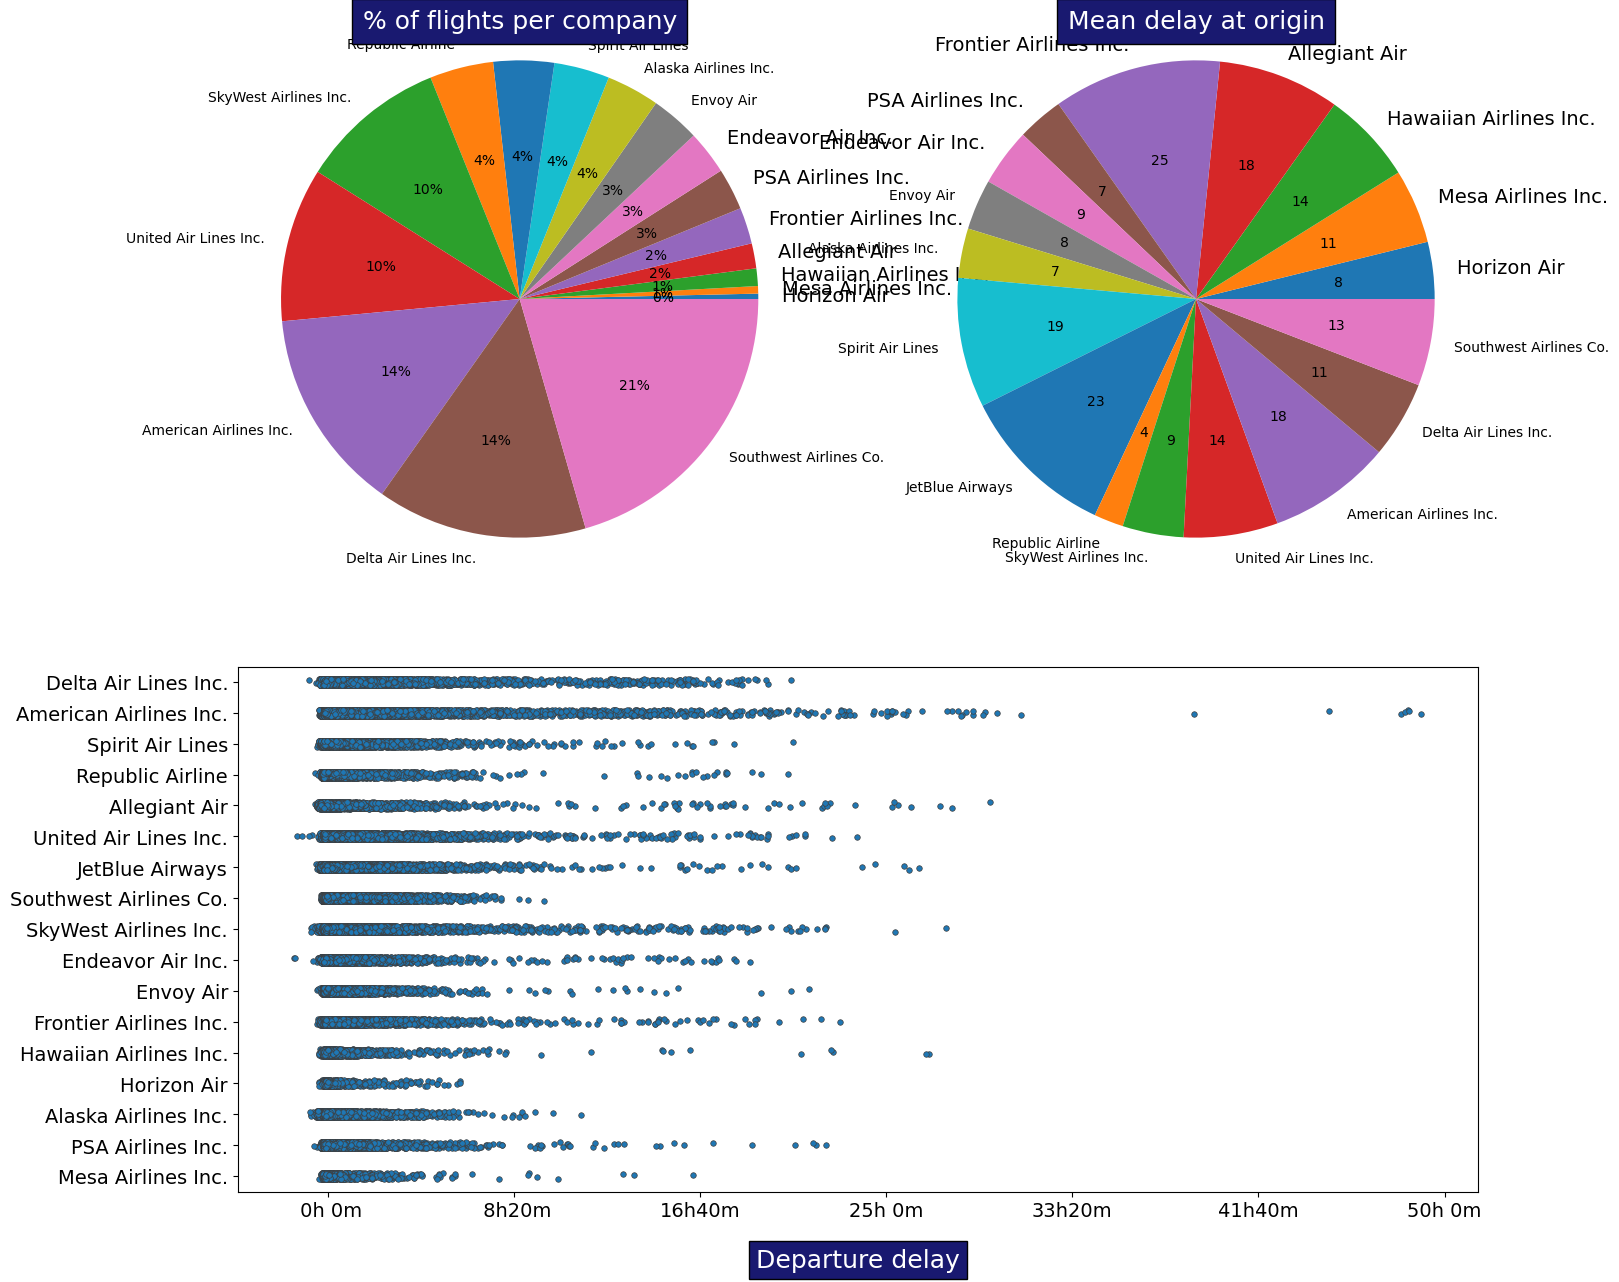

In [7]:
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 

labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len('AIRLINE'))]
patches, texts, autotexts = ax1.pie(sizes,
                                labels=labels,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len('AIRLINE')): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)


sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len('AIRLINE'))]
patches, texts, autotexts = ax2.pie(sizes, labels = labels,
                                 shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))


for i in range(len('AIRLINE')): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

ax3 = sns.stripplot(y="AIRLINE", x="DEP_DELAY", size = 4,
                    data=new_df, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

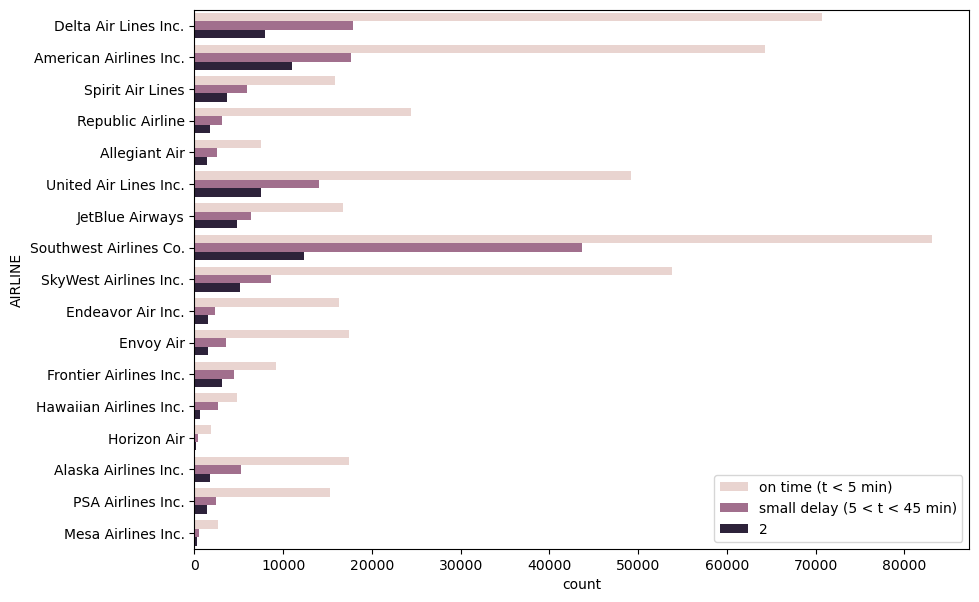

In [8]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
new_df['DELAY'] = new_df['DEP_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY', data=new_df)
L = plt.legend()
L.get_texts()[0].set_text('early departure (t < 0 min)')
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
plt.show()

In [9]:
def analyze_categorical_relationships(data, categorical_column, numerical_column):
    """
    Visualize relationships between a categorical variable and a numerical variable.

    Args:
        data (pd.DataFrame): The dataset.
        categorical_column (str): The name of the categorical column.
        numerical_column (str): The name of the numerical column.
    """
    plt.figure(figsize=(20, 15))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=categorical_column, y=numerical_column, data=data, palette="Set3")
    plt.title(f'Box Plot of {numerical_column} by {categorical_column}', fontsize=14)
    plt.xlabel(categorical_column, fontsize=12)
    plt.ylabel(numerical_column, fontsize=12)
    plt.xticks(rotation=45)

    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x=categorical_column, y=numerical_column, data=data, palette="Set2", inner="quartile")
    plt.title(f'Violin Plot of {numerical_column} by {categorical_column}', fontsize=14)
    plt.xlabel(categorical_column, fontsize=12)
    plt.ylabel(numerical_column, fontsize=12)
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_63860\1065942175.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_column, y=numerical_column, data=data, palette="Set3")
C:\Users\valer\AppData\Local\Temp\ipykernel_63860\1065942175.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_column, y=numerical_column, data=data, palette="Set2", inner="quartile")


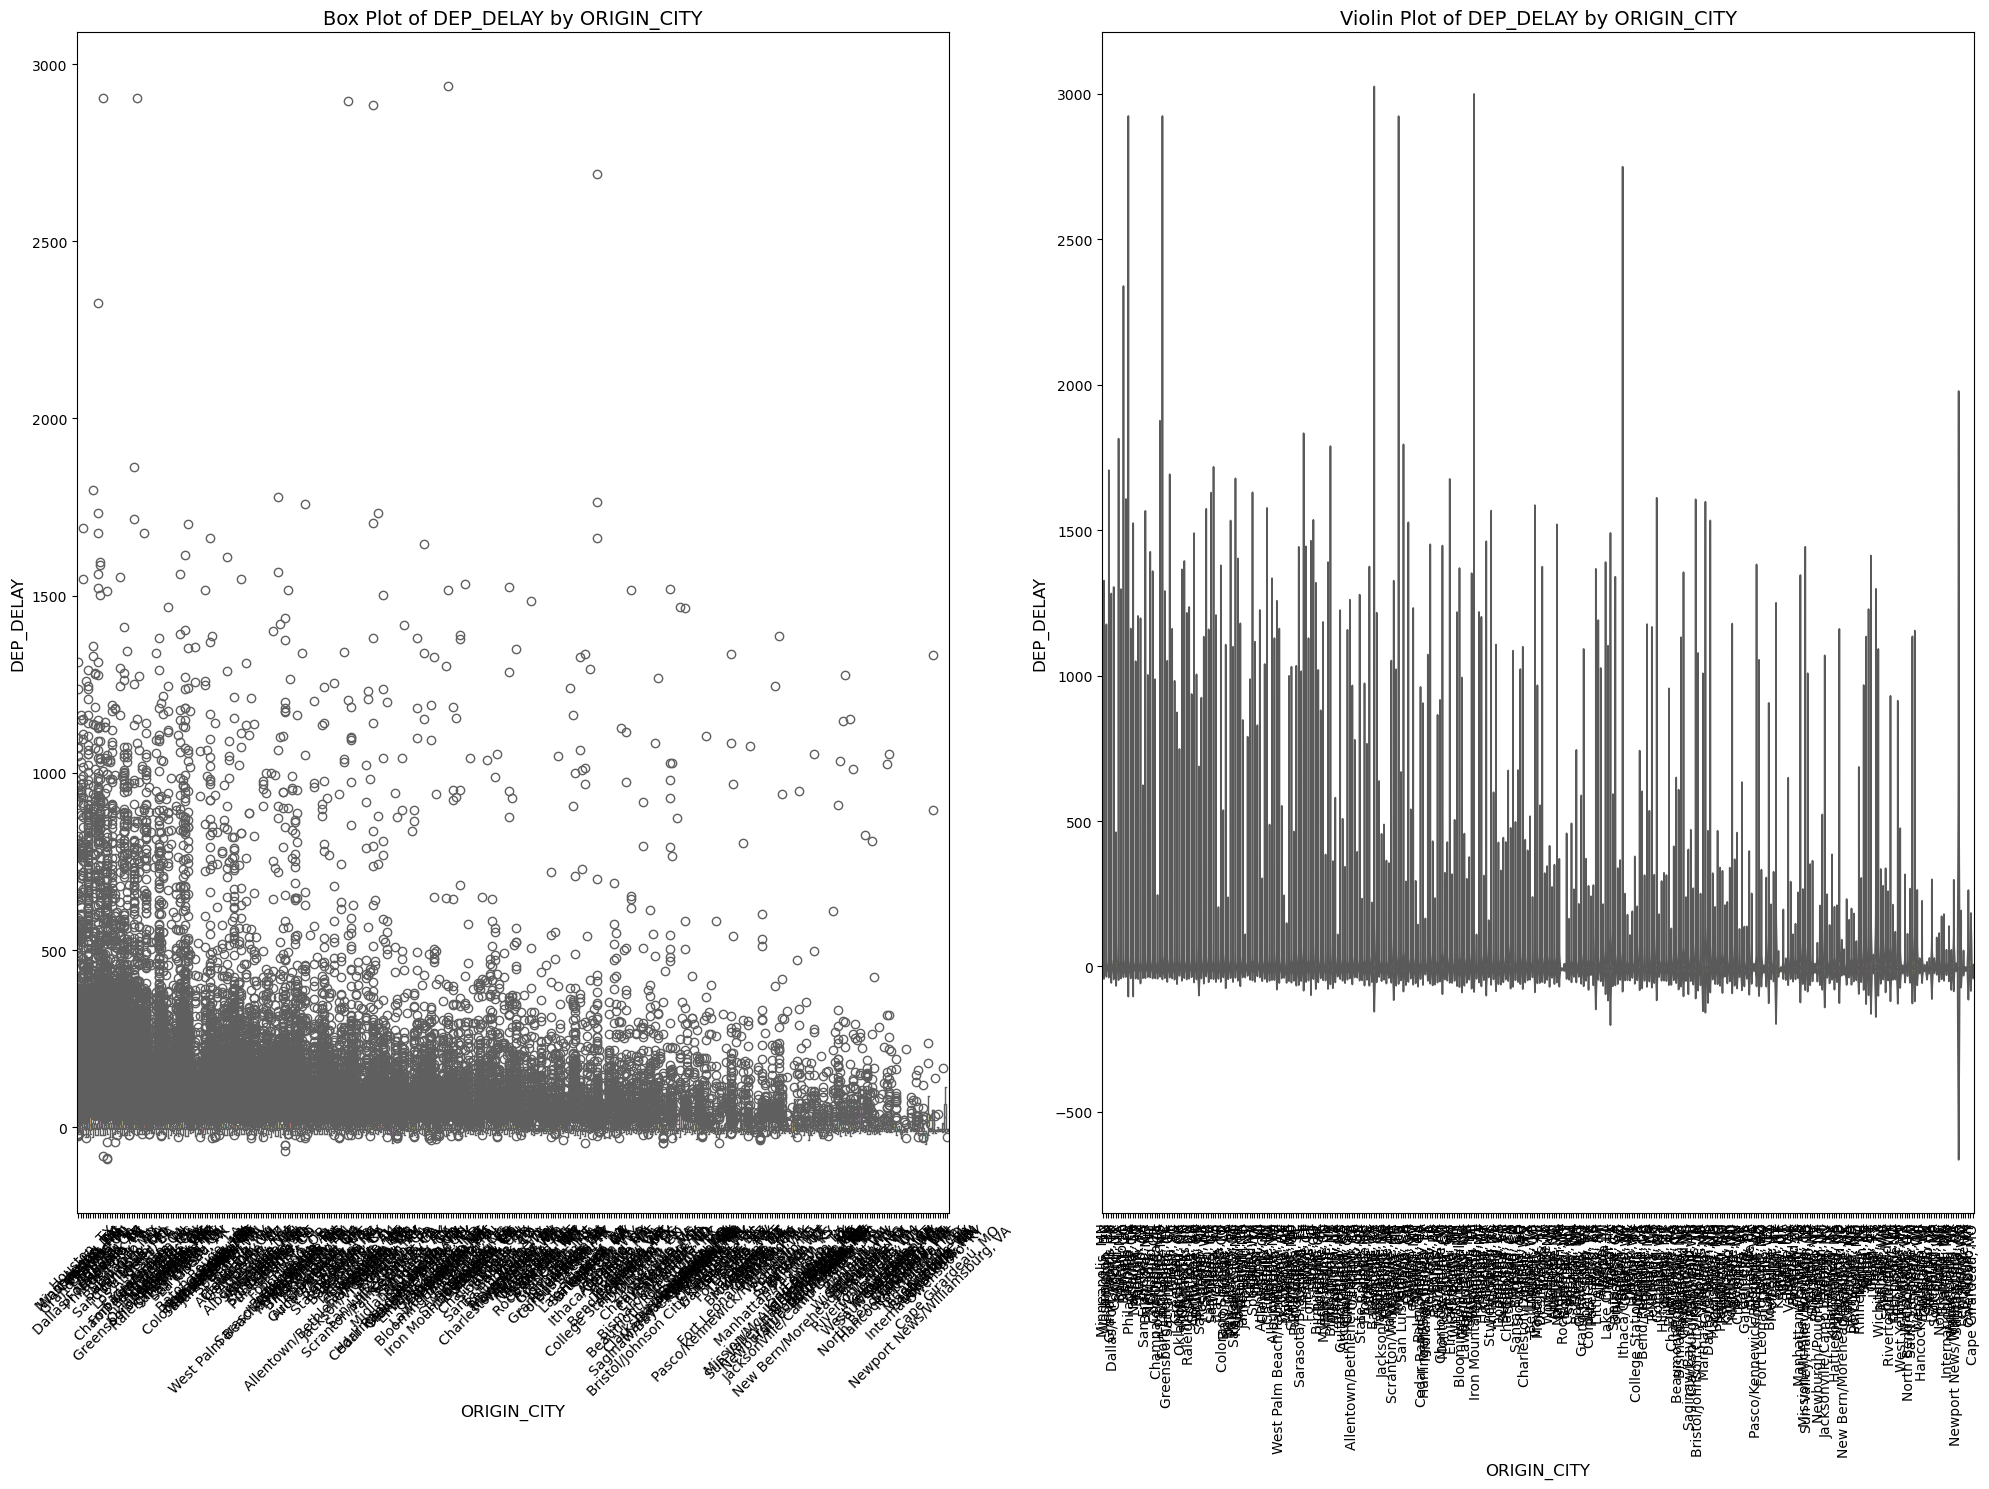

In [10]:
analyze_categorical_relationships(new_df, 'ORIGIN_CITY', 'DEP_DELAY')

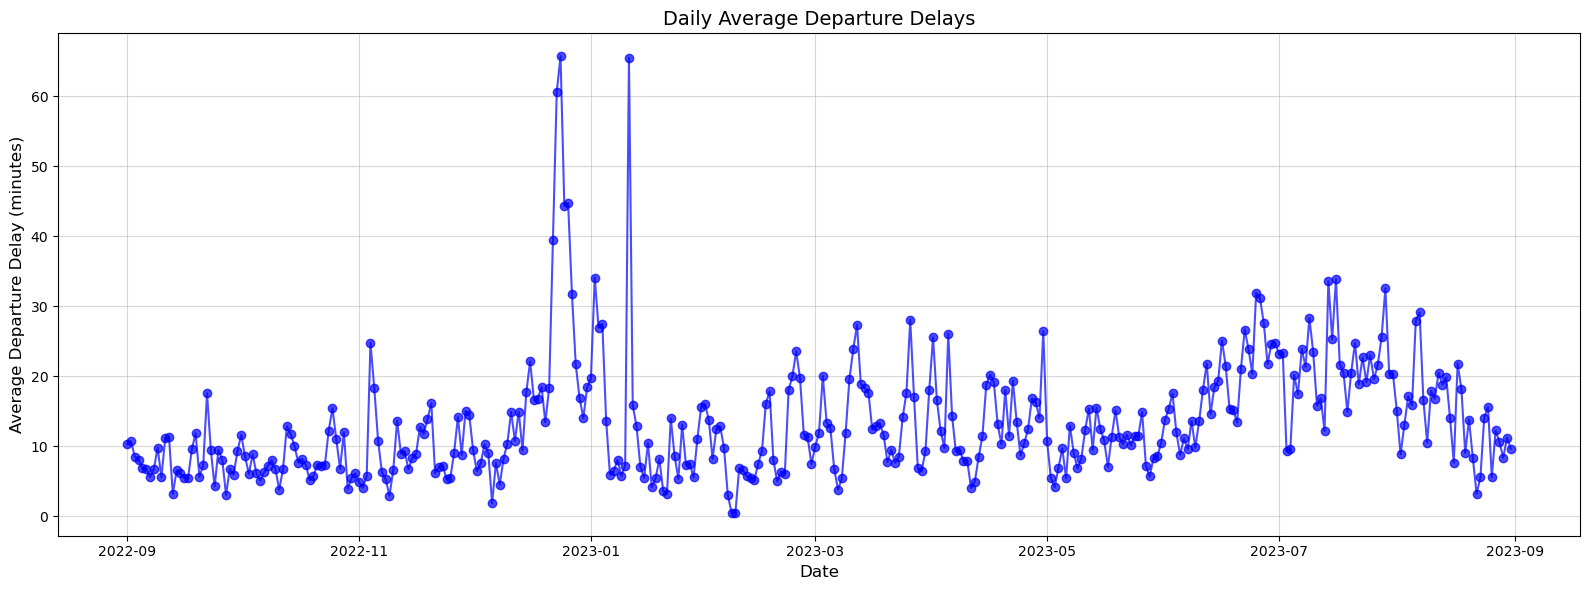

In [11]:
# Combine YEAR, MONTH, and DAY into a single DATE column
new_df['DATE'] = pd.to_datetime(new_df[['YEAR', 'MONTH', 'DAY']])

# Group data by DATE to analyze trends
daily_trends = new_df.groupby('DATE')['DEP_DELAY'].mean()

# Plot daily trends
plt.figure(figsize=(16, 6))
plt.plot(daily_trends.index, daily_trends.values, color='blue', marker='o', linestyle='-', alpha=0.7)
plt.title('Daily Average Departure Delays', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Departure Delay (minutes)', fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [12]:
# Add day of the week
new_df['DAY_OF_WEEK'] = new_df['DATE'].dt.day_name()

In [13]:
def get_time_of_day(dep_time):
    if pd.isnull(dep_time):  # Handle missing values
        return np.nan
    hour = int(dep_time // 100)  # Extract the hour by integer division
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to categorize DEP_TIME
new_df['TIME_OF_DAY'] = new_df['DEP_TIME'].apply(get_time_of_day)

In [14]:
def analyze_categorical_delay(data, category_column, numerical_column, title):
    """
    Visualize the impact of a categorical variable on a numerical variable.

    Args:
        data (pd.DataFrame): The dataset.
        category_column (str): The name of the categorical column.
        numerical_column (str): The name of the numerical column.
        title (str): Title for the plot.
    """
    plt.figure(figsize=(14, 7))
    sns.boxplot(x=category_column, y=numerical_column, data=data, palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel(category_column, fontsize=14)
    plt.ylabel(numerical_column, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

C:\Users\valer\AppData\Local\Temp\ipykernel_63860\1098648174.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category_column, y=numerical_column, data=data, palette="viridis")


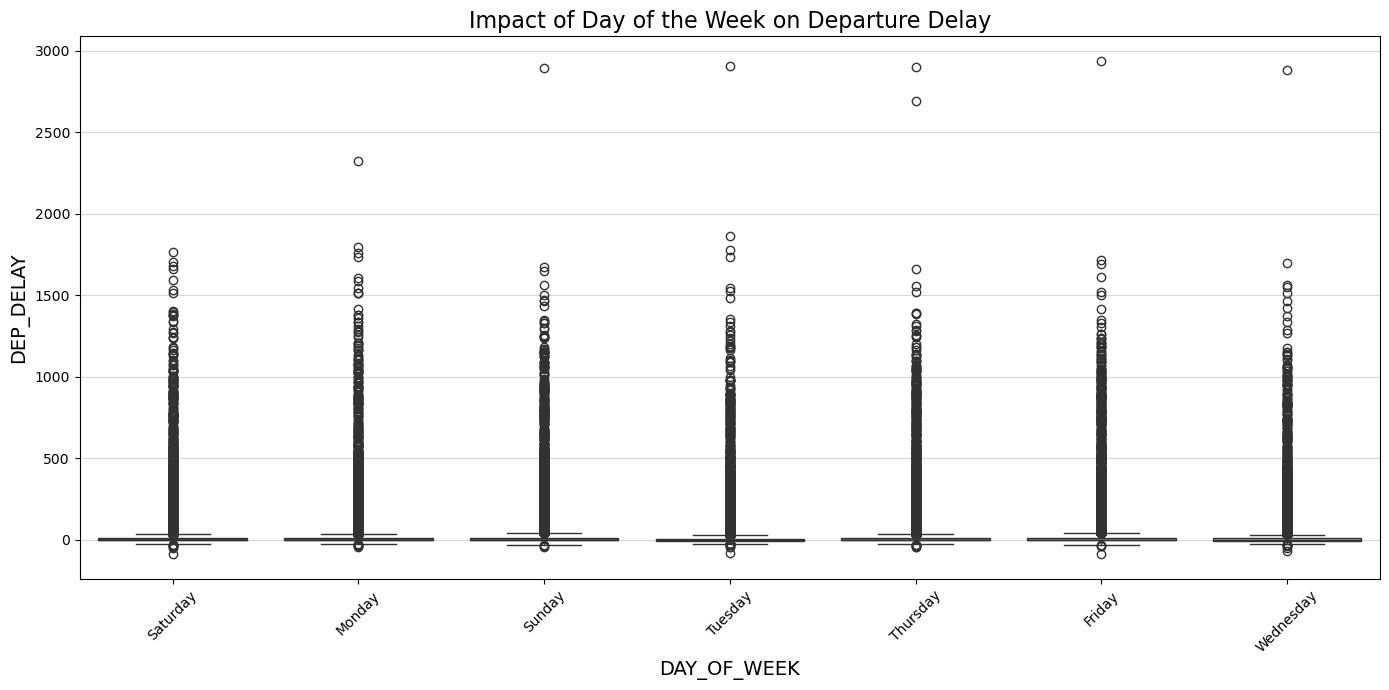

In [16]:
#Analyze impact of DAY_OF_WEEK on DEP_DELAY
analyze_categorical_delay(new_df, 'DAY_OF_WEEK', 'DEP_DELAY', 'Impact of Day of the Week on Departure Delay')

C:\Users\valer\AppData\Local\Temp\ipykernel_63860\1098648174.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category_column, y=numerical_column, data=data, palette="viridis")


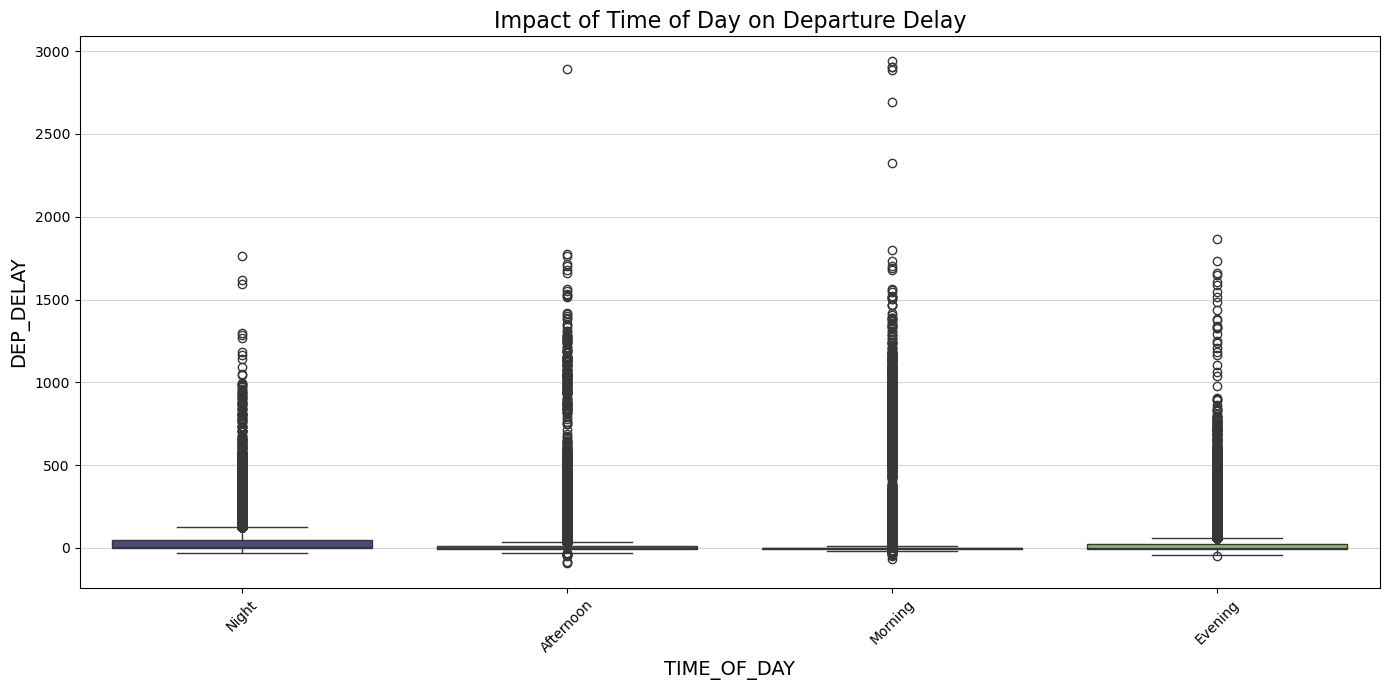

In [17]:
analyze_categorical_delay(new_df, 'TIME_OF_DAY', 'DEP_DELAY', 'Impact of Time of Day on Departure Delay')

In [18]:
# Mean delays by category
print(new_df.groupby('DAY_OF_WEEK')['DEP_DELAY'].mean())

# Median delays by category
print(new_df.groupby('TIME_OF_DAY')['DEP_DELAY'].median())

DAY_OF_WEEK
Friday       15.260601
Monday       12.866308
Saturday     13.969032
Sunday       14.961504
Thursday     13.054114
Tuesday      10.427303
Wednesday    11.924467
Name: DEP_DELAY, dtype: float64
TIME_OF_DAY
Afternoon   -1.0
Evening      1.0
Morning     -3.0
Night        8.0
Name: DEP_DELAY, dtype: float64
